# Airbnb price prediction in NewYork City

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading and exploring Dataset

data used in this notebook is publically avaiable at [website](http://insideairbnb.com/get-the-data.html).
We have used data only for new york city of year 2019

In [3]:
airbnb_df =pd.read_csv('AB_NYC_2019.csv')

In [4]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


As expected none of the value for price is negative. Hence, there is no issue in data collection. We can see that mean price is 152 dollars and median price is 106 dollars

### Check for the null values in each column

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see above there are some missing data for some features. We will address this later.

## Data Visualization

Text(0.5, 1.0, 'Neighbourhood Group')

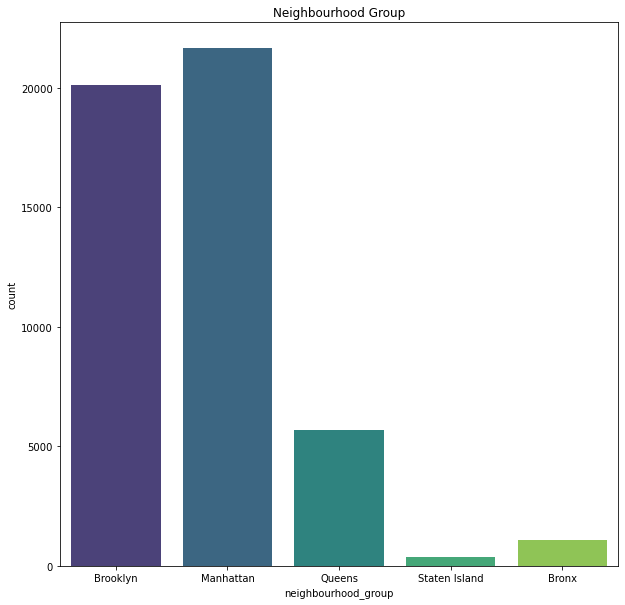

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(airbnb_df['neighbourhood_group'], palette="viridis")
plt.title('Neighbourhood Group')

This Shows that most of Airbnb Listings in New York are near Brooklyn and Manhattan

Text(0.5, 1.0, 'Room type')

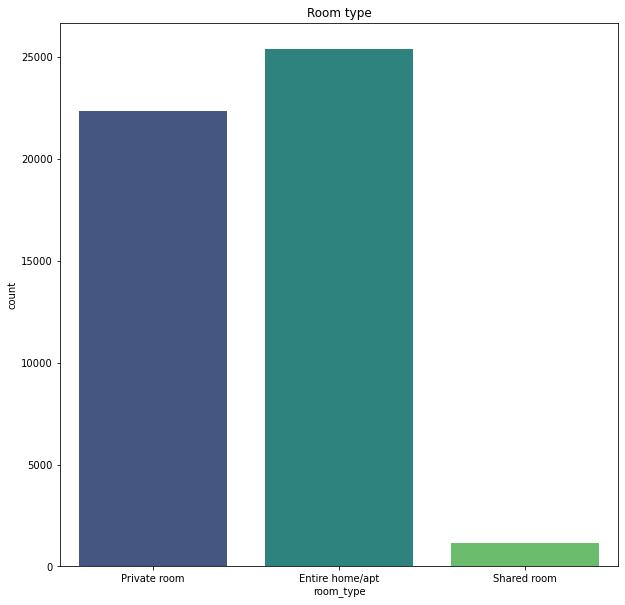

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(airbnb_df['room_type'], palette="viridis")
plt.title('Room type')

Plot shows that Entire Home/Apartment are listed most near Manhattan while Private Rooms and Apartments Near Brooklyn are Nearly Equal

Text(0.5, 1.0, 'Room type')

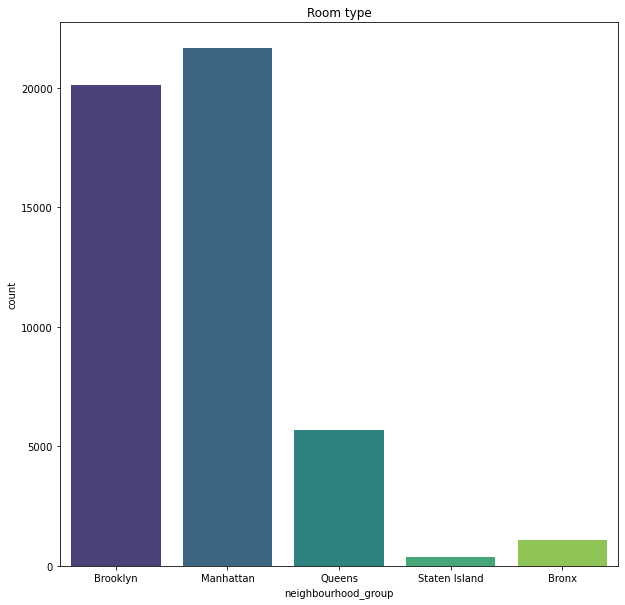

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(airbnb_df['neighbourhood_group'], palette="viridis")
plt.title('Room type')

In [11]:
def create_price_plot(airbnb_df, type_room):
	num_airbnb_df=airbnb_df._get_numeric_data()
	num_airbnb_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)# replaced all values of Infinity with Nan

	# print(num_airbnb_df.dtypes)# checking datatypes of  numeric columns

	# print("------------------------------------------------")
	# print(num_airbnb_df.isnull().sum()) # This shows that oly reviews_per_month had missing values so we have to fill it up

	#replacing all NaN values in 'reviews_per_month' with 0
	num_airbnb_df.fillna({'reviews_per_month':0}, inplace=True)

	#Brooklyn
	subset_brooklyn=airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Brooklyn') & (airbnb_df['room_type']==type_room)]
	price_sub1=num_airbnb_df['price'].iloc[subset_brooklyn.index]# prices for Neighbourhood group having Brooklyn
	percentile_price_brooklyn=[]


	#Bronx
	subset_bronx=airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Bronx') & (airbnb_df['room_type']==type_room)]
	price_sub2=num_airbnb_df['price'].iloc[subset_bronx.index]# prices for Neighbourhood group having Bronx
	percentile_price_Bronx=[]

	#Staten Island
	subset_staten_island=airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Staten Island') & (airbnb_df['room_type']==type_room)]
	price_sub3=num_airbnb_df['price'].iloc[subset_staten_island.index]# prices for Neighbourhood group having Staten Island
	percentile_price_Staten_Island=[] 

	#Queens
	subset_queens=airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Queens') & (airbnb_df['room_type']==type_room)]
	price_sub4=num_airbnb_df['price'].iloc[subset_queens.index]# prices for Neighbourhood group having Queens
	percentile_price_Queens=[]


	#Manhattan
	subset_manhattan=airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Manhattan') & (airbnb_df['room_type']==type_room)]
	price_sub5=num_airbnb_df['price'].iloc[subset_manhattan.index]# prices for Neighbourhood group having Manhattan
	percentile_price_Manhattan=[]

	percentiles=[]# percentiles
	for i in range(25,91):
	    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
	    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
	    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
	    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
	    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
	    percentiles.append(i)   

	plt.title('Prices of '+type_room,fontsize=15,color='Red')
	sns.set_style("darkgrid")

	# for i in range(2):

	sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
	sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
	sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
	sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
	sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

	sd.set(xlabel='Percentiles', ylabel='Percentile Prices in U.S $')

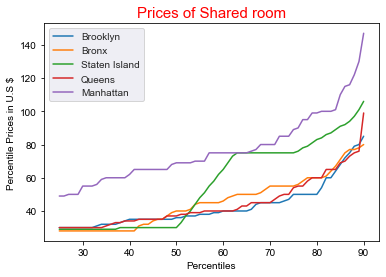

In [12]:
create_price_plot(airbnb_df, 'Shared room')

Above plot shows the comparison of prices of Shared Rooms, this Shows getting a shared room is cheapest near Bronx and costliest near Manhattan

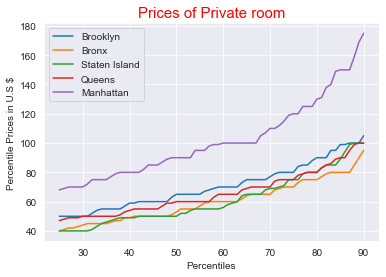

In [13]:
create_price_plot(airbnb_df, 'Private room')

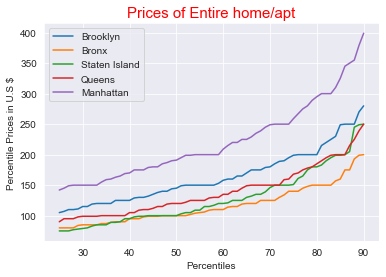

In [14]:
create_price_plot(airbnb_df, 'Entire home/apt')

### Map of New York

<img src="nyc_map.png">

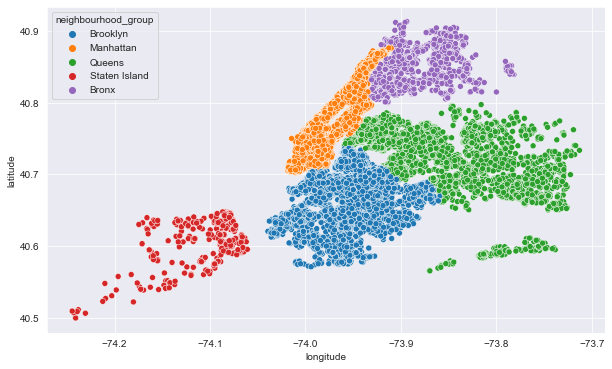

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)
plt.ioff()

The above plot shows the count of available spots in different neighborhoods. We can see most of AirBnb are in Brooklyn and Manhattan.

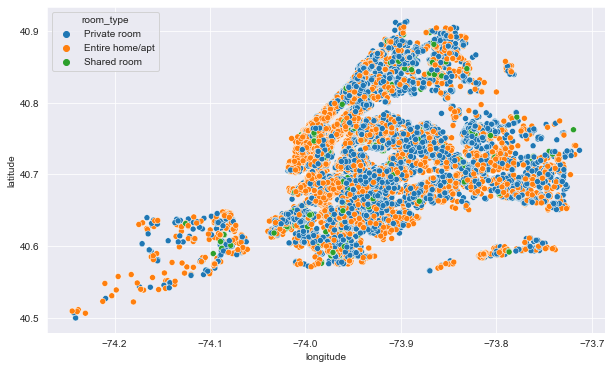

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.room_type)
plt.ioff()

The above plot shows the roomtype of different Airbnb spots in NYC.

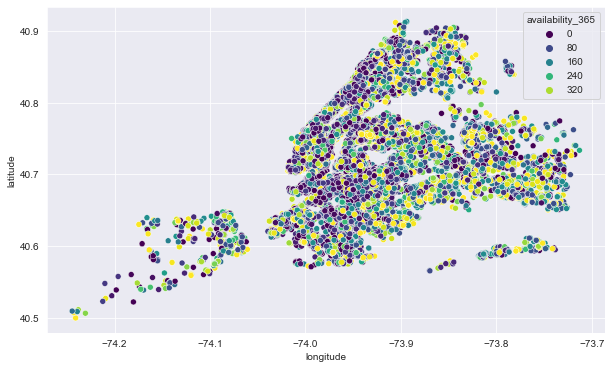

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.availability_365,palette="viridis")
plt.ioff()

## Modelling

#### Drop unnecessary columns

In [18]:
airbnb_df.drop(['host_id','host_name','latitude','longitude','neighbourhood','last_review'], axis=1, inplace=True)
#examing the changes
airbnb_df.head(5)

,id,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Manhattan,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,Entire home/apt,80,10,9,0.10,1,0


#### Encode categorical columns

In [19]:
airbnb_en_df = airbnb_df.copy()
for column in airbnb_en_df.columns[airbnb_en_df.columns.isin(['neighbourhood_group', 'room_type'])]:
    airbnb_en_df[column] = airbnb_en_df[column].factorize()[0]
airbnb_en_df.head()

,id,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,0,0,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,1,1,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,1,0,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,0,1,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,1,1,80,10,9,0.10,1,0


In [20]:
mean = airbnb_en_df['reviews_per_month'].mean()
airbnb_en_df['reviews_per_month'].fillna(mean, inplace=True)
airbnb_en_df.isnull().sum()

id                                 0
name                              16
neighbourhood_group                0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [21]:
airbnb_en_df = airbnb_en_df[airbnb_en_df['name'].notna()]
airbnb_en_df.isnull().sum()

id                                0
name                              0
neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Multicollinearity

<AxesSubplot:>

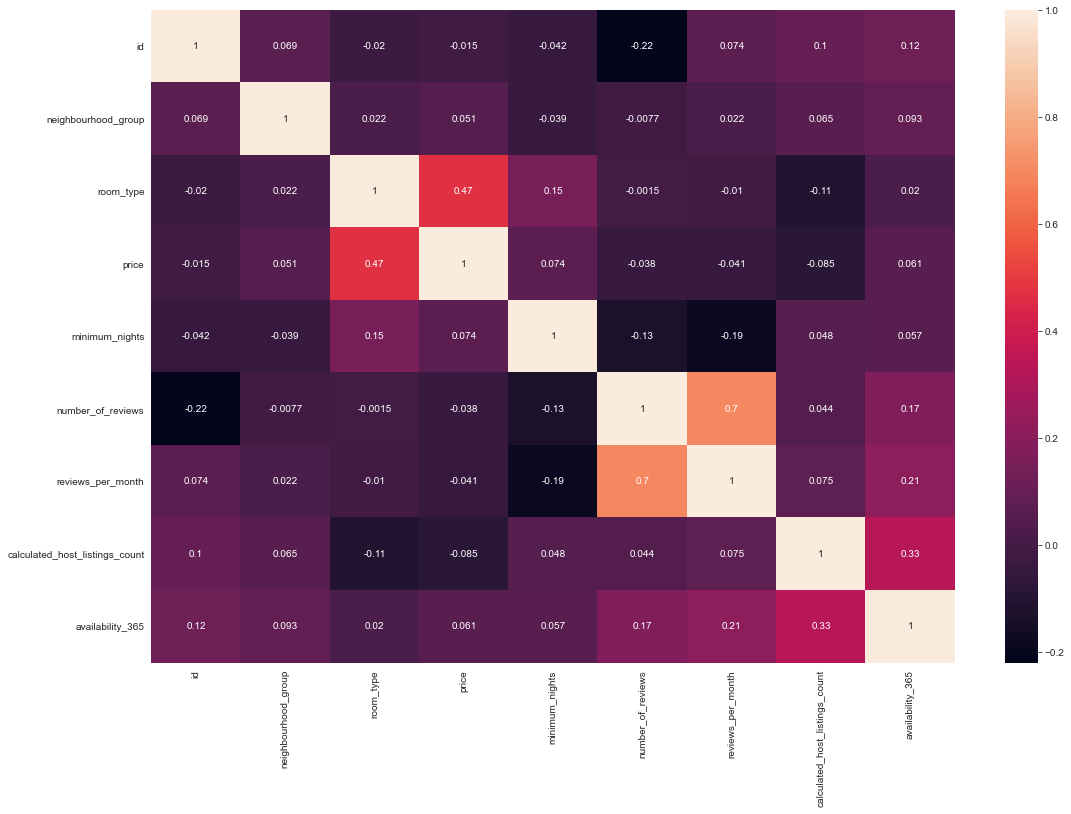

In [22]:
corr = airbnb_en_df.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

### Multiple Linear Regression

In [23]:
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.89440317, 1.52819613, 1.3945467 , 0.24599855, 1.07693653,
       0.9394004 , 0.78795948, 0.50794741, 0.62461165])

None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
x = airbnb_en_df.iloc[:,[2,3,5,6,7,8,9]]
y = airbnb_en_df['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=123)

In [26]:
reg=LinearRegression(normalize = True)
reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [27]:
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.051717557049061

#### ummm, why not a good fit ?

Text(0.5, 1.0, 'Price Distribution Plot')

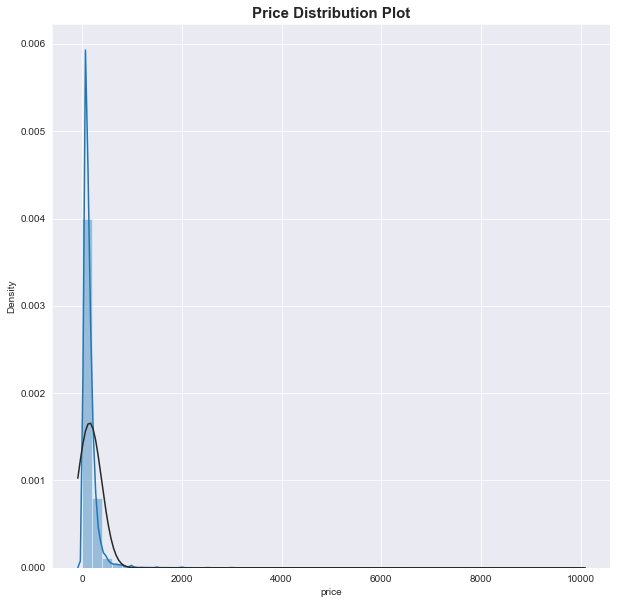

In [28]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
sns.distplot(airbnb_df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

<AxesSubplot:xlabel='price_log', ylabel='Density'>

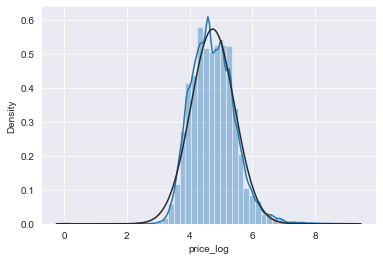

In [29]:
airbnb_en_df['price_log'] = np.log(airbnb_en_df.price+1)
sns.distplot(airbnb_en_df['price_log'], fit=norm)

In [30]:
x = airbnb_en_df.iloc[:,[2,3,5,6,7,8,9]]
y = airbnb_en_df['price_log']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [31]:
reg=LinearRegression(normalize = True)
reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [32]:
y_pred=reg.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2649708745921414

In [34]:
cdf = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficients'])
print(cdf)

                                Coefficients
neighbourhood_group                -0.022278
room_type                           0.587701
minimum_nights                     -0.000928
number_of_reviews                  -0.000194
reviews_per_month                  -0.022220
calculated_host_listings_count      0.001463
availability_365                    0.000459


### Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

[-7.41564822e-14  2.92003441e-01  1.84902673e+00 -3.19649750e-03
  1.61581340e-04 -1.20147823e-02  2.53530272e-03  1.10440858e-03
 -1.01630492e-01 -6.28268450e-03 -1.92826410e-04 -2.60647526e-04
 -7.90770475e-03 -2.95325613e-03  2.31132046e-05 -1.02527658e+00
 -8.12233415e-04 -9.77208417e-04 -2.43671850e-03  1.24401832e-03
  1.74549009e-04  4.84747082e-06  3.30520440e-05 -9.30730610e-04
  1.78745925e-06 -5.58220346e-07  4.21116888e-06 -5.89271739e-05
 -1.40670946e-04 -2.84448505e-06  9.45128946e-04  5.92953440e-04
 -4.91847191e-05  3.92468775e-06 -5.58100552e-06 -1.05450228e-06]
['1', 'neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group^2', 'neighbourhood_group room_type', 'neighbourhood_group minimum_nights', 'neighbourhood_group number_of_reviews', 'neighbourhood_group reviews_per_month', 'neighbourhood_group calculated_host_listings_count', 'neighbourhood_group avail

In [65]:
y_pred=polyreg.predict(x_test)

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.44581841725650684

An additional step to retrieve detailed coefficients. Note that this step uses a different approach to compute the polynomial matrix, followed by LinearRegression.  Probably a more elegant way to do this exists.

In [67]:
poly = PolynomialFeatures(degree)
X_ = poly.fit_transform(x_train)
model = LinearRegression(fit_intercept=True)
model.fit(X_, y_train)
print(model.coef_)

[-7.41564822e-14  2.92003441e-01  1.84902673e+00 -3.19649750e-03
  1.61581340e-04 -1.20147823e-02  2.53530272e-03  1.10440858e-03
 -1.01630492e-01 -6.28268450e-03 -1.92826410e-04 -2.60647526e-04
 -7.90770475e-03 -2.95325613e-03  2.31132046e-05 -1.02527658e+00
 -8.12233415e-04 -9.77208417e-04 -2.43671850e-03  1.24401832e-03
  1.74549009e-04  4.84747082e-06  3.30520440e-05 -9.30730610e-04
  1.78745925e-06 -5.58220346e-07  4.21116888e-06 -5.89271739e-05
 -1.40670946e-04 -2.84448505e-06  9.45128946e-04  5.92953440e-04
 -4.91847191e-05  3.92468775e-06 -5.58100552e-06 -1.05450228e-06]


In [69]:
p = PolynomialFeatures(degree=2).fit(x_train)
xcol=p.get_feature_names(x_train.columns)
cdf = pd.DataFrame(model.coef_, xcol, columns=['Coefficients'])
print(cdf)

                                                    Coefficients
1                                                  -7.415648e-14
neighbourhood_group                                 2.920034e-01
room_type                                           1.849027e+00
minimum_nights                                     -3.196497e-03
number_of_reviews                                   1.615813e-04
reviews_per_month                                  -1.201478e-02
calculated_host_listings_count                      2.535303e-03
availability_365                                    1.104409e-03
neighbourhood_group^2                              -1.016305e-01
neighbourhood_group room_type                      -6.282684e-03
neighbourhood_group minimum_nights                 -1.928264e-04
neighbourhood_group number_of_reviews              -2.606475e-04
neighbourhood_group reviews_per_month              -7.907705e-03
neighbourhood_group calculated_host_listings_count -2.953256e-03
neighbourhood_group avail

## Conclusion
In this notebook, I try to make predictions with different Regression models. In the next workshop, we will use large dataset to illustrate classification algorithms.